In [3]:
#hide
! [ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

In [4]:
#hide
from fastbook import *
from fastai.vision.widgets import *
from time import sleep

# Do modelo à produção

As seis linhas de código que vimos em <<chapter_intro>> são apenas uma pequena parte do processo de uso do aprendizado profundo na prática. Neste capítulo, usaremos um exemplo de visão computacional para examinar o processo completo de criação de um aplicativo de aprendizado profundo. Mais especificamente, vamos construir um classificador de ursos! No processo, discutiremos os recursos e as restrições do aprendizado profundo, exploraremos como criar conjuntos de dados, veremos possíveis pegadinhas ao usar o aprendizado profundo na prática e muito mais. Muitos dos pontos-chave se aplicarão igualmente bem a outros problemas de aprendizado profundo, como os do <<chapter_intro>>. Se você resolver um problema semelhante em aspectos importantes aos nossos problemas de exemplo, esperamos que obtenha excelentes resultados com pouco código rapidamente.

Vamos começar com como você deve enquadrar seu problema.

## A prática de aprendizado profundo

Vimos que o aprendizado profundo pode resolver muitos problemas desafiadores rapidamente e com pouco código.Como iniciante, há um ponto ideal de problemas semelhantes o suficiente aos nossos problemas de exemplo que você pode obter rapidamente resultados extremamente úteis.No entanto, o aprendizado profundo não é mágico!As mesmas 6 linhas de código não funcionam para todos os problemas que alguém pode pensar hoje.Subestimar as restrições e superestimar as capacidades da aprendizagem profunda pode levar a resultados frustrantemente ruins, pelo menos até que você obtenha alguma experiência e possa resolver os problemas que surgem.Por outro lado, superestimar as restrições e subestimar as capacidades do aprendizado profundo pode significar que você não tenta um problema solucionável porque se fala com isso.

Frequentemente conversamos com pessoas que subestimam as restrições e as capacidades do aprendizado profundo.Ambos podem ser problemas: subestimar os recursos significa que você pode nem tentar coisas que podem ser muito benéficas e subestimar as restrições podem significar que você não consegue considerar e reagir a questões importantes.

A melhor coisa a fazer é manter a mente aberta.Se você permanecer aberto à possibilidade de que o aprendizado profundo possa resolver parte do seu problema com menos dados ou complexidade do que você espera, é possível projetar um processo em que você possa encontrar os recursos e restrições específicos relacionados ao seu problema específico ao trabalharatravés do processo.Isso não significa fazer apostas arriscadas - mostraremos como você pode lançar gradualmente os modelos para que eles não criem riscos significativos e possam até apoiá -los antes de colocá -los em produção.

### Iniciando seu projeto

Então, onde você deve começar sua jornada de aprendizado profundo?O mais importante é garantir que você tenha algum projeto para trabalhar - é apenas trabalhando em seus próprios projetos que você obterá experiência real de criação e uso de modelos.Ao selecionar um projeto, a consideração mais importante é a disponibilidade de dados.Independentemente de você estar fazendo um projeto apenas para sua própria aprendizagem ou para aplicação prática em sua organização, você deseja algo em que possa começar rapidamente.Vimos muitos estudantes, pesquisadores e profissionais do setor desperdiçando meses ou anos enquanto tentam encontrar seu conjunto de dados perfeito.O objetivo não é encontrar o conjunto de dados ou projeto "perfeito", mas apenas para começar e iterar a partir daí.

Se você adotar essa abordagem, estará na sua terceira iteração de aprendizado e melhoria, enquanto os perfeccionistas ainda estão nos estágios de planejamento!

Também sugerimos que você itine de ponta a ponta em seu projeto;Ou seja, não gaste meses ajustando seu modelo, ou polindo a GUI perfeita, ou rotulando o conjunto de dados perfeito ... em vez disso, complete cada etapa e você pode em uma quantidade razoável de tempo, até o fim.Por exemplo, se sua meta final é um aplicativo que é executado em um telefone celular, esse deve ser o que você tem após cada iteração.Mas talvez nas primeiras iterações você pegue alguns atalhos, por exemplo, fazendo todo o processamento em um servidor remoto e usando um aplicativo Web simples e responsivo.Ao concluir o projeto de ponta a ponta do projeto, você verá onde estão os bits mais complicados e quais bits fazem a maior diferença para o resultado final.

Enquanto você trabalha neste livro, sugerimos que você complete muitas pequenas experiências, executando e ajustando os notebooks que fornecemos, ao mesmo tempo em que desenvolve gradualmente seus próprios projetos.Dessa forma, você estará obtendo experiência com todas as ferramentas e técnicas que estamos explicando, enquanto as discutimos.

> S: Para aproveitar ao máximo este livro, reserve um tempo para experimentar entre cada capítulo, seja em seu próprio projeto ou explorando os notebooks que fornecemos.Em seguida, tente reescrever esses notebooks do zero em um novo conjunto de dados.É apenas praticando (e falhando) muito que você terá uma intuição de como treinar um modelo.

Ao usar a abordagem de iteração de ponta a ponta, você também entenderá melhor os dados necessários.Por exemplo, você pode achar que só pode obter facilmente 200 itens de dados rotulados e não pode realmente saber até tentar se é o suficiente para obter o desempenho necessário para que seu aplicativo funcione bem na prática.

Em um contexto organizacional, você poderá mostrar aos seus colegas que sua ideia pode realmente funcionar, mostrando a eles um protótipo de funcionamento real.Observamos repetidamente que esse é o segredo para obter uma boa adesão organizacional para um projeto.

Como é mais fácil começar um projeto em que você já tem dados disponíveis, isso significa que provavelmente é mais fácil começar um projeto relacionado a algo que você já está fazendo, porque você já tem dados sobre coisas que está fazendo.Por exemplo, se você trabalha no negócio da música, poderá ter acesso a muitas gravações.Se você trabalha como radiologista, provavelmente tem acesso a muitas imagens médicas.Se você estiver interessado em preservação da vida selvagem, pode ter acesso a muitas imagens da vida selvagem.

Às vezes, você precisa ser um pouco criativo.Talvez você possa encontrar algum projeto anterior de aprendizado de máquina, como uma concorrência de Kaggle, relacionada ao seu campo de interesse.Às vezes, você tem que se comprometer.Talvez você não consiga encontrar os dados exatos necessários para o projeto preciso que você tem em mente;Mas você pode encontrar algo de um domínio semelhante ou medido de uma maneira diferente, abordando um problema um pouco diferente.Trabalhar nesses tipos de projetos semelhantes ainda fornecerá uma boa compreensão do processo geral e poderá ajudá -lo a identificar outros atalhos, fontes de dados e assim por diante.

Especialmente quando você está apenas começando com o aprendizado profundo, não é uma boa idéia se ramificar em áreas muito diferentes, para lugares para a qual o aprendizado profundo não foi aplicado antes.Isso porque se o seu modelo não funcionar a princípio, você não saberá se é porque cometeu um erro ou se o problema que está tentando resolver simplesmente não é solucionável com o aprendizado profundo.E você não saberá onde procurar obter ajuda.Portanto, é melhor começar a começar com algo em que você pode encontrar um exemplo online, onde alguém teve bons resultados com algo que é pelo menos um pouco semelhante ao que você está tentando alcançar, ou onde você pode converter seus dados em um formatoSemelhante ao que alguém já usou antes (como criar uma imagem a partir de seus dados).Vamos dar uma olhada no estado de aprendizado profundo, só para saber que tipo de aprendizado profundo é bom agora.

### O estado de aprendizado profundo

Vamos começar considerando se o aprendizado profundo pode ser bom no problema em que você deseja trabalhar.Esta seção fornece um resumo do estado de aprendizado profundo no início de 2020. No entanto, as coisas se movem muito rápido e, quando você lê isso, algumas dessas restrições podem não existir mais.Tentaremos manter o [site do livro] (https://book.fast.ai/) up-date;Além disso, é provável que uma pesquisa no Google por "o que a IA pode fazer agora" forneça informações atuais.

#### Visão computacional

Existem muitos domínios em que o aprendizado profundo ainda não foi usado para analisar imagens, mas aqueles em que foi tentado quase universalmente demonstraram que os computadores podem reconhecer quais itens estão em uma imagem pelo menos tão bem quanto as pessoas podem - mesmo pessoas especialmente treinadas, como radiologistas.Isso é conhecido como *reconhecimento de objetos *.O aprendizado profundo também é bom em reconhecer onde estão os objetos em uma imagem e podem destacar seus locais e nomear cada objeto encontrado.Isso é conhecido como *Detecção de Objeto *(também há uma variante disso que vimos em << CAPLET_INTRO >>, onde cada pixel é categorizado com base em que tipo de objeto ele faz parte - isso é chamado *segmentação *).Os algoritmos de aprendizado profundo geralmente não são bons em reconhecer imagens que são significativamente diferentes em estrutura ou estilo para aqueles usados para treinar o modelo.Por exemplo, se não houvesse imagens em preto e branco nos dados de treinamento, o modelo poderá se sair mal em imagens em preto e branco.Da mesma forma, se os dados de treinamento não continham imagens desenhadas à mão, o modelo provavelmente se sairá mal nas imagens desenhadas à mão.Não há maneira geral de verificar que tipos de imagens estão faltando em seu conjunto de treinamento, mas mostraremos neste capítulo algumas maneiras de tentar reconhecer quando os tipos de imagem inesperados surgem nos dados quando o modelo está sendo usado na produção (isso éconhecido como verificação de dados * fora do domínio *).

Um grande desafio para os sistemas de detecção de objetos é que a rotulagem de imagens pode ser lenta e cara.No momento, há muito trabalho entrando em ferramentas para tentar tornar essa rotulagem mais rápida e mais fácil e exigir menos rótulos artesanais para treinar modelos precisos de detecção de objetos.Uma abordagem particularmente útil é gerar sinteticamente variações de imagens de entrada, como girá -las ou alterando seu brilho e contraste;Isso é chamado * Aumentação de dados * e também funciona bem para texto e outros tipos de modelos.Vamos discutir isso em detalhes neste capítulo.

Outro ponto a considerar é que, embora seu problema possa não parecer um problema de visão computacional, pode ser possível com um pouco de imaginação transformá -lo em um.Por exemplo, se o que você está tentando classificar são sons, você pode tentar converter os sons em imagens de suas formas de onda acústica e treinar um modelo nessas imagens.

#### Texto (processamento de linguagem natural)

Os computadores são muito bons em classificar documentos curtos e longos com base em categorias como spam ou não spam, o sentimento (por exemplo, é a revisão positiva ou negativa), autor, site de origem e assim por diante.Não estamos cientes de nenhum trabalho rigoroso realizado nesta área para compará -los aos seres humanos, mas, anedotalmente, parece -nos que o desempenho profundo do aprendizado é semelhante ao desempenho humano nessas tarefas.O aprendizado profundo também é muito bom em gerar texto apropriado para o contexto, como respostas a postagens de mídia social e imitar o estilo de um autor em particular.É bom em tornar esse conteúdo atraente para os seres humanos também-na verdade, ainda mais atraente do que o texto gerado pelo ser humano.No entanto, o aprendizado profundo atualmente não é bom em gerar respostas * corretas *!Atualmente, não temos uma maneira confiável de, por exemplo, combinar uma base de conhecimento de informações médicas com um modelo de aprendizado profundo para gerar respostas de linguagem natural medicamente corretas.Isso é muito perigoso, porque é muito fácil criar conteúdo que parece para um leigo ser atraente, mas na verdade está totalmente incorreto.

Outra preocupação é que respostas altamente convincentes e apropriadas para o contexto nas mídias sociais possam ser usadas em escala maciça-milhares de vezes maior do que qualquer fazenda troll anteriormente vista-para espalhar desinformação, criar agitação e incentivar conflitos.Como regra geral, os modelos de geração de texto sempre estarão tecnologicamente um pouco à frente dos modelos que reconhecem o texto gerado automaticamente.Por exemplo, é possível usar um modelo que possa reconhecer conteúdo gerado artificialmente para melhorar o gerador que cria esse conteúdo, até que o modelo de classificação não seja mais capaz de concluir sua tarefa.

Apesar dessas questões, a aprendizagem profunda tem muitas aplicações na PNL: pode ser usada para traduzir o texto de um idioma para outro, resumir documentos longos em algo que pode ser digerido mais rapidamente, encontrar todas as menções a um conceito de interesse e muito mais.Infelizmente, a tradução ou resumo pode muito bem incluir informações completamente incorretas!No entanto, o desempenho já é bom o suficiente para que muitas pessoas estejam usando esses sistemas - por exemplo, o sistema de tradução on -line do Google (e qualquer outro serviço on -line que conhecemos) se baseia no aprendizado profundo.

#### Combinando texto e imagens

A capacidade de aprender profundo a combinar texto e imagens em um único modelo é, geralmente, muito melhor do que a maioria das pessoas espera intuitivamente.Por exemplo, um modelo de aprendizado profundo pode ser treinado em imagens de entrada com legendas de saída escritas em inglês e pode aprender a gerar legendas surpreendentemente apropriadas automaticamente para novas imagens!Mas, novamente, temos o mesmo aviso que discutimos na seção anterior: não há garantia de que essas legendas estejam realmente corretas.

Devido a esse problema sério, geralmente recomendamos que o aprendizado profundo seja usado não como um processo totalmente automatizado, mas como parte de um processo no qual o modelo e um usuário humano interagem de perto.Isso pode potencialmente tornar as ordens de magnitude dos seres humanos mais produtivos do que seriam com métodos inteiramente manuais e realmente resultar em processos mais precisos do que usar um humano sozinho.Por exemplo, um sistema automático pode ser usado para identificar possíveis vítimas de AVC diretamente a partir de tomografia computadorizada e enviar um alerta de alta prioridade para que essas varreduras analisem rapidamente.Há apenas uma janela de três horas para tratar traços, para que esse ciclo de feedback rápido possa salvar vidas.Ao mesmo tempo, no entanto, todas as varreduras poderiam continuar sendo enviadas aos radiologistas da maneira usual, para que não haja redução nas contribuições humanas.Outros modelos de aprendizado profundo podem medir automaticamente os itens vistos nas varreduras e inserir essas medições nos relatórios, alertando os radiologistas sobre as descobertas que eles podem ter perdido e contando sobre outros casos que podem ser relevantes.

#### Dados tabulares

Para analisar séries temporais e dados tabulares, o Deep Learning tem feito recentemente grandes progressos.No entanto, o aprendizado profundo é geralmente usado como parte de um conjunto de vários tipos de modelo.Se você já possui um sistema que está usando florestas aleatórias ou máquinas de reforço de gradiente (ferramentas populares de modelagem tabular sobre as quais você aprenderá em breve), depois mudar ou adicionar aprendizado profundo pode não resultar em melhorias dramáticas.A aprendizagem profunda aumenta bastante a variedade de colunas que você pode incluir-por exemplo, colunas contendo linguagem natural (títulos de livros, críticas etc.) e colunas categóricas de alta cardicalidade (ou seja, algo que contém um grande número de opções discretas,como CEP ou ID do produto).No lado negativo, os modelos de aprendizado profundo geralmente levam mais tempo para treinar do que florestas aleatórias ou máquinas de reforço de gradiente, embora isso esteja mudando graças a bibliotecas como [Rapids] (https://rapids.ai/), que fornece aceleração da GPU para oPipeline de modelagem inteira.Cobrimos os prós e contras de todos esses métodos em detalhes em << Capítulo_tabular >>.

#### Sistemas de recomendação 

Os sistemas de recomendação são realmente apenas um tipo especial de dados tabulares.Em particular, eles geralmente têm uma variável categórica de alta cardinalidade representando usuários e outro representando produtos (ou algo semelhante).Uma empresa como a Amazon representa todas as compras que já foram feitas por seus clientes como uma matriz esparsa gigante, com clientes como linhas e produtos como colunas.Depois que eles têm os dados nesse formato, os cientistas de dados aplicam alguma forma de filtragem colaborativa para *preencher a matriz *.Por exemplo, se o cliente A compra os produtos 1 e 10, e o cliente B compra produtos 1, 2, 4 e 10, o motor recomendará que uma compra 2 e 4. Porque os modelos de aprendizado profundo sejam bons no manuseio de variáveis categóricas de alta cardinalidade, eles são muito bons para lidar com sistemas de recomendação.Eles se tornam particulares, assim como para dados tabulares, ao combinar essas variáveis com outros tipos de dados, como linguagem ou imagens naturais.Eles também podem fazer um bom trabalho ao combinar todos esses tipos de informações com metadados adicionais representados como tabelas, como informações do usuário, transações anteriores e assim por diante.

No entanto, quase todas as abordagens de aprendizado de máquina têm a desvantagem de que eles apenas informam quais produtos um usuário em particular pode gostar, em vez de quais recomendações seriam úteis para um usuário.Muitos tipos de recomendações para produtos que um usuário pode gostar pode não ser útil - por exemplo, se o usuário já estiver familiarizado com os produtos ou se forem simplesmente embalagens diferentes de produtos que já compraram (como um conjunto de caixas de caixaOs romances, quando eles já têm cada um dos itens nesse conjunto).Jeremy gosta de ler livros de Terry Pratchett e, por um tempo, a Amazon não estava recomendando nada além de Terry Pratchett Books (veja << Pratchett >>), o que realmente não foi útil porque ele já estava ciente desses livros!

<img alt="Terry Pratchett books recommendation" caption="A not-so-useful recommendation" id="pratchett" src="https://raw.githubusercontent.com/fastai/fastbook/823b69e00aa1e1c1a45fe88bd346f11e8f89c1ff//images/pratchett.png">

#### Outros tipos de dados

Muitas vezes, você descobre que os tipos de dados específicos de domínio se encaixam muito bem nas categorias existentes.Por exemplo, as cadeias de proteínas se parecem muito com documentos de linguagem natural, pois são longas seqüências de tokens discretos com relacionamentos e significado complexos ao longo da sequência.E, de fato, acaba que o uso de métodos de aprendizado profundo da PNL é a abordagem atual de ponta para muitos tipos de análise de proteínas.Como outro exemplo, os sons podem ser representados como espectrogramas, que podem ser tratados como imagens;Abordagens de aprendizado profundo para imagens acabam funcionando muito bem em espectrogramas.

### A abordagem do trem de força (Drivetrain)

Existem muitos modelos precisos que não são úteis para ninguém, e muitos modelos imprecisos que são altamente úteis.Para garantir que seu trabalho de modelagem seja útil na prática, você precisa considerar como seu trabalho será usado.Em 2012, Jeremy, juntamente com Margit Zwemer e Mike Loukides, introduziram um método chamado * A abordagem do trem de força * para pensar sobre esse problema.

A abordagem do trem de força, ilustrada em << DriveTrain >>, foi descrita em detalhes em ["Projetando ótimos produtos de dados"] (https://www.oreilly.com/radar/driveTrain-approach-data-products/).A idéia básica é começar considerando seu objetivo e depois pensar em quais ações você pode tomar para atingir esse objetivo e quais dados você tem (ou pode adquirir) que podem ajudar e depois criar um modelo que você pode usar para determinar o melhorAções a serem tomadas para obter os melhores resultados em termos de seu objetivo.

<img src="https://raw.githubusercontent.com/fastai/fastbook/823b69e00aa1e1c1a45fe88bd346f11e8f89c1ff//images/drivetrain-approach.png" id="drivetrain" caption="The Drivetrain Approach">

Considere um modelo em um veículo autônomo: você deseja ajudar um carro a dirigir com segurança do ponto A ao ponto B sem intervenção humana.A grande modelagem preditiva é uma parte importante da solução, mas não se sustenta por conta própria;À medida que os produtos se tornam mais sofisticados, ele desaparece no encanamento.Alguém que usa um carro autônomo não tem conhecimento das centenas (se não milhares) de modelos e os petabytes de dados que o fazem funcionar.Mas, à medida que os cientistas de dados constroem produtos cada vez mais sofisticados, eles precisam de uma abordagem sistemática de design.

Utilizamos dados não apenas para gerar mais dados (na forma de previsões), mas para produzir *resultados acionáveis *.Esse é o objetivo da abordagem do trem de força.Comece definindo um objetivo *claro *.Por exemplo, o Google, ao criar seu primeiro mecanismo de pesquisa, considerado "Qual é o principal objetivo do usuário em digitar em uma consulta de pesquisa?"Isso os levou ao seu objetivo, que era "mostrar o resultado de pesquisa mais relevante".O próximo passo é considerar o que * alavancas * você pode puxar (ou seja, quais ações você pode tomar) para alcançar melhor esse objetivo.No caso do Google, esse foi o ranking dos resultados da pesquisa.O terceiro passo foi considerar quais novos dados * eles precisariam produzir esse ranking;Eles perceberam que as informações implícitas sobre quais páginas vinculadas às outras páginas poderiam ser usadas para esse fim.Somente após essas três primeiras etapas começamos a pensar em construir os modelos *preditivos *.Nossas alavancas objetivas e disponíveis, quais dados já temos e quais dados adicionais precisamos coletar, determinar os modelos que podemos criar.Os modelos levarão as alavancas e quaisquer variáveis incontroláveis como suas entradas;As saídas dos modelos podem ser combinadas para prever o estado final para o nosso objetivo.

Vamos considerar outro exemplo: sistemas de recomendação.O * objetivo * de um mecanismo de recomendação é impulsionar vendas adicionais surpreendentes e encantando o cliente com recomendações de itens que eles não teriam comprado sem a recomendação.A alavanca * é o ranking das recomendações.Os novos dados * *devem ser coletados para gerar recomendações que *causarão novas vendas *.Isso exigirá a realização de muitos experimentos randomizados para coletar dados sobre uma ampla gama de recomendações para uma ampla gama de clientes.Este é um passo que poucas organizações dão;Mas sem ele, você não tem as informações necessárias para otimizar as recomendações com base no seu verdadeiro objetivo (mais vendas!).

Por fim, você pode construir dois modelos * para probabilidades de compra, condicionado a ver ou não ver uma recomendação.A diferença entre essas duas probabilidades é uma função de utilidade para uma determinada recomendação a um cliente.Ele será baixo nos casos em que o algoritmo recomenda um livro familiar que o cliente já rejeitou (ambos os componentes são pequenos) ou um livro que eles teriam comprado mesmo sem a recomendação (ambos os componentes são grandes e se cancelam).

Como você pode ver, na prática frequentemente a implementação prática de seus modelos exigirá muito mais do que apenas treinar um modelo!Muitas vezes, você precisa executar experimentos para coletar mais dados e considerar como incorporar seus modelos no sistema geral que você está desenvolvendo.Falando em dados, agora vamos focar em como encontrar dados para o seu projeto.

## Juntando informação

Para muitos tipos de projetos, você poderá encontrar todos os dados necessários online.O projeto que estaremos concluindo neste capítulo é um *Detector de Urso *.Ele discriminará entre três tipos de urso: ursos pardos, pretos e de pelúcia.Existem muitas imagens na Internet de cada tipo de urso que podemos usar.Só precisamos de uma maneira de encontrá -los e baixá -los.Fornecemos uma ferramenta que você pode usar para esse fim, para que você possa acompanhar este capítulo e criar seu próprio aplicativo de reconhecimento de imagem para quaisquer tipos de objetos em que você esteja interessado. No curso Fast.ai, milhares de estudantes têmApresentou seu trabalho nos fóruns do curso, exibindo tudo, desde variedades de beija -flor em Trinidad a tipos de ônibus no Panamá - um aluno até criou um aplicativo que ajudaria sua noiva a reconhecer seus 16 primos durante as férias de Natal!

No momento da redação deste artigo, a Bing Image Search é a melhor opção que conhecemos para encontrar e baixar imagens.É gratuito para até 1.000 consultas por mês, e cada consulta pode baixar até 150 imagens.No entanto, algo melhor pode ter surgido entre quando escrevemos isso e quando você estiver lendo o livro, por isso não deixe de conferir o [site do livro] (https://book.fast.ai/) para obter nossa recomendação atual.

> IMPORTANTE: Mantendo contato com os serviços mais recentes: serviços que podem ser usados para criar conjuntos de dados vêm e vêm o tempo todo, e seus recursos, interfaces e preços mudam regularmente também.Nesta seção, mostraremos como usar a API de pesquisa de imagem Bing disponível no momento em que este livro foi escrito.Forneceremos mais opções e mais informações atualizadas no [site do livro] (https://book.fast.ai/), então não se esqueça de dar uma olhada lá agora para obter as informações mais atuais sobre como fazerFaça o download das imagens da web para criar um conjunto de dados para aprendizado profundo.

# limpeza
Para baixar imagens com a pesquisa de imagens Bing, inscreva -se em [Microsoft Azure](https://azure.microsoft.com/en-us/services/cognitive-services/bing-web-search-api/) Para uma conta gratuita.Você receberá uma chave, que pode copiar e inserir em uma célula como segue (substituindo 'xxx' pela sua chave e executando -a):

> (Descontinuada) Irei ignorar este passo, em 2023 já podemos utilizar o DDG para baixar imagens diretamente da API

In [ ]:
# key = os.environ.get('AZURE_SEARCH_KEY', 'XXX')

(Descontinuada)

Ou, se você estiver confortável na linha de comando, pode configurá -la no seu terminal com:

    export AZURE_SEARCH_KEY=your_key_here

e reinicie o notebook Jupyter e use a linha acima sem editá -la.

Depois de definir `key`, você pode usar` Search_images_bing`.Esta função é fornecida pela pequena classe `Utils` incluída nos notebooks online.Se você não tem certeza de onde uma função é definida, basta digitá -la no seu caderno para descobrir:

In [ ]:
search_images_ddg

In [3]:
results = search_images_ddg('Ursos Pardos')
ims = results.attrgot('contentUrl')
len(ims)

200

Fomos baixados com sucesso os URLs de 150 ursos pardos (ou, pelo menos, imagens que a pesquisa de imagens DDG encontra para esse termo de pesquisa).

**NB**: Não há como ter certeza exatamente de quais imagens uma pesquisa como essa encontrará.Os resultados podem mudar com o tempo.Ouvimos falar de pelo menos um caso de um membro da comunidade que encontrou algumas fotos desagradáveis de ursos mortos em seus resultados de pesquisa.Você receberá as imagens encontradas pelo mecanismo de pesquisa da web.Se você está executando isso no trabalho, ou com crianças, etc., tenha cuidado antes de exibir as imagens baixadas.

Vejamos um:

In [4]:
#hide
ims = ['http://3.bp.blogspot.com/-S1scRCkI3vY/UHzV2kucsPI/AAAAAAAAA-k/YQ5UzHEm9Ss/s1600/Grizzly%2BBear%2BWildlife.jpg']

In [5]:
dest = 'images/grizzly.jpg'
download_url(ims[0], dest)

Path('images/grizzly.jpg')

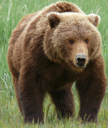

In [6]:
im = Image.open(dest)
im.to_thumb(128,128)

Isso parece ter funcionado bem, então vamos usar o `download_images 'da FastAi para baixar todos os URLs para cada um de nossos termos de pesquisa.Colocaremos cada um em uma pasta separada:

In [7]:
bear_types = 'grizzly','black','teddy'
path = Path('bears')

In [ ]:
if not path.exists():
    path.mkdir()
    # for o in bear_types:
    #     dest = (path/o)
    #     dest.mkdir(exist_ok=True)
    #     results = search_images_ddg(f'{o} bear')
    #     download_images(dest, urls=results.attrgot('contentUrl'))
    
    for o in bear_types:
        dest = (path/o)
        dest.mkdir(exist_ok=True)
        download_images(dest, urls=search_images_ddg(f'{o} bear photo',max_images=20))
        sleep(10)  # Pause between searches to avoid over-loading server
        download_images(dest, urls=search_images_ddg(f'{o} bear sun photo',max_images=20))
        sleep(10)
        download_images(dest, urls=search_images_ddg(f'{o} bear shade photo',max_images=20))
        sleep(10)
        # download_images(dest, urls=search_images_ddg(f'{o} bear black and white photo',max_images=20))
        resize_images(path/o, max_size=400, dest=path/o)

# dest = (path/'black')
# dest.mkdir(exist_ok=True)
# download_images(dest, urls=search_images_ddg('black bear shade photo',max_images=20))
# resize_images(path/path/'black', max_size=400, dest=path/o)

Nossa pasta tem arquivos de imagem, como esperávamos:

In [18]:
fns = get_image_files(path)
fns

(#137) [Path('bears/black/04717ea0-b392-4dd5-a2e4-f61ddf5da9eb.jpg'),Path('bears/black/07c7ac63-a8af-4d74-a081-d802b75e7f86.jpg'),Path('bears/black/163ab046-0c18-409e-8fc3-f8d6abffb3e0.JPG'),Path('bears/black/1a44f0bd-979e-436b-bf1f-8db73ca3b100.jpg'),Path('bears/black/371f0dd0-5f27-416e-b5d3-c6495a39ddbc.jpg'),Path('bears/black/3fd47aa2-a06d-433b-b51f-a3016ede3a2c.jpg'),Path('bears/black/4675f31f-ce3e-4f05-aa91-baf9e0a991da.jpg'),Path('bears/black/5ab58bb1-d230-4c69-afd5-8acf32862136.jpg'),Path('bears/black/a1bab7a5-64cd-4466-a6e3-e1d64ccf37f0.jpg'),Path('bears/black/a39e5a7a-e73e-4e05-91d7-f36aa0f66a2b.jpg')...]

> J: Eu adoro isso sobre trabalhar em cadernos de Jupyter!É tão fácil construir gradualmente o que eu quero e verificar meu trabalho a cada passo do caminho.Eu cometo um pouco de erros, então isso é realmente útil para mim ...

Muitas vezes, quando baixamos arquivos da Internet, existem alguns que são corruptos.Vamos checar:

In [19]:
failed = verify_images(fns)
failed

(#0) []

Para remover todas as imagens com falha, você pode usar o `desvincular 'em cada uma delas.Observe que, como a maioria das funções fastai que retornam uma coleção, `verify_images` retorna um objeto do tipo` l`, que inclui o método `map`.Isso chama a função passada em cada elemento da coleção:

In [20]:
failed.map(Path.unlink);

### Barra lateral: Obtendo ajuda nos cadernos Jupyter

Os notebooks Jupyter são ótimos para experimentar e ver imediatamente os resultados de cada função, mas também há muita funcionalidade para ajudá -lo a descobrir como usar funções diferentes ou mesmo observar diretamente o código -fonte deles.Por exemplo, se você digitar uma célula:
```
??verify_images
```
a window will pop up with:
```
Signature: verify_images(fns)
Source:   
def verify_images(fns):
    "Find images in `fns` that can't be opened"
    return L(fns[i] for i,o in
             enumerate(parallel(verify_image, fns)) if not o)
File:      ~/git/fastai/fastai/vision/utils.py
Type:      function
```
Isso nos diz que argumento a função aceita (`fns`), então mostra o código -fonte e o arquivo de onde vem.Olhando para esse código -fonte, podemos vê -lo aplica a função `verify_image` em paralelo e apenas mantém os arquivos de imagem para os quais o resultado dessa função é` false`, que é consistente com a string doc: encontra as imagens em ``FNS 'que não pode ser aberto.

Aqui estão alguns outros recursos que são muito úteis nos cadernos Jupyter:

- A qualquer momento, se você não se lembra da ortografia exata de uma função ou nome de argumento, poderá pressionar a guia para obter sugestões de conclusão automática.
- Quando estiver dentro dos parênteses de uma função, pressionar o turno e a guia simultaneamente exibirá uma janela com a assinatura da função e uma breve descrição.Pressionar essas teclas duas vezes expandirá a documentação e pressioná -las três vezes abrirá uma janela completa com as mesmas informações na parte inferior da tela.
- Em uma célula, digitar `? Func_name` e execução abrirá uma janela com a assinatura da função e uma descrição curta.
- Em uma célula, digitar `?
- Se você estiver usando a biblioteca FASTAI, adicionamos uma função `doc 'para você: executando` doc (func_name) `em uma célula abrirá uma janela com a assinatura da função, uma descrição curta e links para o código -fonte ligado emGithub e a documentação completa da função nos [documentos da biblioteca] (https://docs.fast.ai).
- Não relacionado à documentação, mas ainda é muito útil: obter ajuda a qualquer momento se você receber um erro, digite `%Debug` na próxima célula e execute para abrir o [Python Debugger] (https://docs.python.org/3/library/pdb.html), que permitirá que você inspecione o conteúdo de todas as variáveis.

### Barra lateral final

Uma coisa a estar ciente nesse processo: como discutimos em << CAPLET_INTRO >>, os modelos só podem refletir os dados usados para treiná -los.E o mundo está cheio de dados tendenciosos, que acabam refletidos, por exemplo, Bing Image Search (que usamos para criar nosso conjunto de dados).Por exemplo, digamos que você estivesse interessado em criar um aplicativo que poderia ajudar os usuários a descobrir se tinham pele saudável, então você treinou um modelo sobre os resultados das pesquisas por (digamos) "pele saudável".<< Healthy_skin >> mostra os tipos de resultados que você obteria.

<img src="https://raw.githubusercontent.com/fastai/fastbook/823b69e00aa1e1c1a45fe88bd346f11e8f89c1ff//images/healthy_skin.gif" width="600" caption="Data for a healthy skin detector?" id="healthy_skin">

Com isso como seus dados de treinamento, você acabaria com um detector de pele saudável, mas uma * jovem branca tocando seu rosto * detector!Certifique -se de pensar cuidadosamente sobre os tipos de dados que você pode esperar ver na prática em seu aplicativo e verifique cuidadosamente para garantir que todos esses tipos sejam refletidos nos dados de origem do seu modelo.Nota de rodapé: [Graças a Deb Raji, que criou o exemplo de "pele saudável".Consulte seu artigo ["Auditoria acionável: investigando o impacto dos resultados de desempenho tendenciosos de nomeação pública dos produtos comerciais de IA"] (https://dl.acm.org/doi/10.1145/3306618.3314244) para obter mais insights fascinantes em viés de modelo.]

Agora que baixamos alguns dados, precisamos montá -los em um formato adequado para treinamento de modelos.Em Fastai, isso significa criar um objeto chamado `dataloaders`.

## De dados para DataLoaders

`Dataloaders` é uma classe fina que apenas armazena os objetos` dataloader` que você passa e os disponibiliza como 'trem` e `válido'.Embora seja uma classe muito simples, é muito importante no FastAi: fornece os dados para o seu modelo.A principal funcionalidade em `dataloaders` é fornecida com apenas essas quatro linhas de código (tem alguma outra funcionalidade menor que vamos pular por enquanto):

```python
class DataLoaders(GetAttr):
    def __init__(self, *loaders): self.loaders = loaders
    def __getitem__(self, i): return self.loaders[i]
    train,valid = add_props(lambda i,self: self[i])
```

> jargão: Dataloaders: uma classe Fastai que armazena vários objetos `dataloader` que você passa para ela, normalmente um 'trem` e um` válido`, embora seja possível ter o quantos você quiser.Os dois primeiros são disponibilizados como propriedades.

Mais tarde, no livro, você também aprenderá sobre as classes `DataSet` e` DataSets`, que têm o mesmo relacionamento.

Para transformar nossos dados baixados em um objeto `dataloaders`, precisamos dizer ao Fastai pelo menos quatro coisas:

- Com que tipos de dados estamos trabalhando
- Como obter a lista de itens
- Como rotular esses itens
- Como criar o conjunto de validação

Até agora, vimos vários métodos de fábrica * para combinações específicas dessas coisas, que são convenientes quando você possui uma estrutura de aplicação e dados que se encaixam nesses métodos predefinidos.Pois quando não o fizer, o FastAi possui um sistema extremamente flexível chamado *API do bloco de dados *.Com esta API, você pode personalizar totalmente todas as etapas da criação de seus `dataloaders`.Aqui está o que precisamos para criar um `dataloaders` para o conjunto de dados que acabamos de baixar:

In [21]:
bears = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

Vejamos cada um desses argumentos por sua vez.Primeiro, fornecemos uma tupla em que especificamos quais tipos queremos para as variáveis independentes e dependentes:

`` `python
Blocks = (ImageBlock, CategoryBlock)
`` `

A * variável independente * é a coisa que estamos usando para fazer previsões e a * variável dependente * é a nossa meta.Nesse caso, nossas variáveis independentes são imagens e nossas variáveis dependentes são as categorias (tipo de urso) para cada imagem.Veremos muitos outros tipos de bloco no restante deste livro.

Para este `dataloaders ', nossos itens subjacentes serão caminhos de arquivo.Temos que dizer ao Fastai como obter uma lista desses arquivos.A função `get_image_files` segue um caminho e retorna uma lista de todas as imagens nesse caminho (recursivamente, por padrão):

`` `python
get_items = get_image_files
`` `

Freqüentemente, os conjuntos de dados que você baixam já têm um conjunto de validação definido.Às vezes, isso é feito colocando as imagens para os conjuntos de treinamento e validação em diferentes pastas.Às vezes, é feito fornecendo um arquivo CSV no qual cada nome de arquivo está listado juntamente com o conjunto de dados em que deve estar. Há muitas maneiras de isso pode ser feito, e o FastAi fornece uma abordagem muito geral que permite que você use um de seus predefinidosAulas para isso, ou para escrever o seu próprio.Nesse caso, no entanto, simplesmente queremos dividir nossos conjuntos de treinamento e validação aleatoriamente.No entanto, gostaríamos de dividir a mesma divisão de treinamento/validação sempre que executamos este notebook, por isso corrigimos a semente aleatória (os computadores não sabem como criar números aleatórios, mas simplesmente criamos listas de números que parecem aleatórios; se você fornecer o mesmo ponto de partida para essa lista a cada vez, chamou a *semente * - então você obterá exatamente a mesma lista a cada vez):


`` `python
splitter = randomsplitter (valid_pct = 0.2, semente = 42)
`` `

A variável independente é frequentemente chamada de `x` e a variável dependente é frequentemente chamada de` y`.Aqui, estamos dizendo a Fastai que função chamar para criar os rótulos em nosso conjunto de dados:

```python
get_y=parent_label
```

`Parent_label` é uma função fornecida pela Fastai que simplesmente obtém o nome da pasta em que um arquivo está. Como colocamos cada uma de nossas imagens de urso em pastas com base no tipo de urso, isso vai nos dar os rótulos que precisamos.

Nossas imagens são tamanhos diferentes, e isso é um problema para o aprendizado profundo: não alimentamos a imagem Model One de cada vez, mas várias delas (o que chamamos de *mini-lo-lotes *).Para agrupá -los em uma grande matriz (geralmente chamada de *tensor *) que passará pelo nosso modelo, todos precisam ter o mesmo tamanho.Portanto, precisamos adicionar uma transformação que redimensione essas imagens do mesmo tamanho.* O item se transforma* são peças de código que são executadas em cada item individual, seja uma imagem, categoria ou mais.O Fastai inclui muitas transformações predefinidas;nós usamos o `Resize` Transforme aqui:

```python
item_tfms=Resize(128)
```

Este comando nos deu um objeto `datablock`.É como um modelo * para criar um `dataloaders`.Ainda precisamos dizer à Fastai a fonte real de nossos dados - nesse caso, o caminho em que as imagens podem ser encontradas:

In [42]:
dls = bears.dataloaders(path)

Um `dataloaders` inclui validação e treinamento `dataloader `. `Dataloader` é uma classe que fornece lotes de alguns itens por vez para a GPU.Vamos aprender muito mais sobre esta aula no próximo capítulo.Quando você percorre um `dataloader` fastai, fornece 64 itens (por padrão) por vez, todos empilhados em um único tensor.Podemos dar uma olhada em alguns desses itens chamando o método `show_batch` em um` dataloader`:

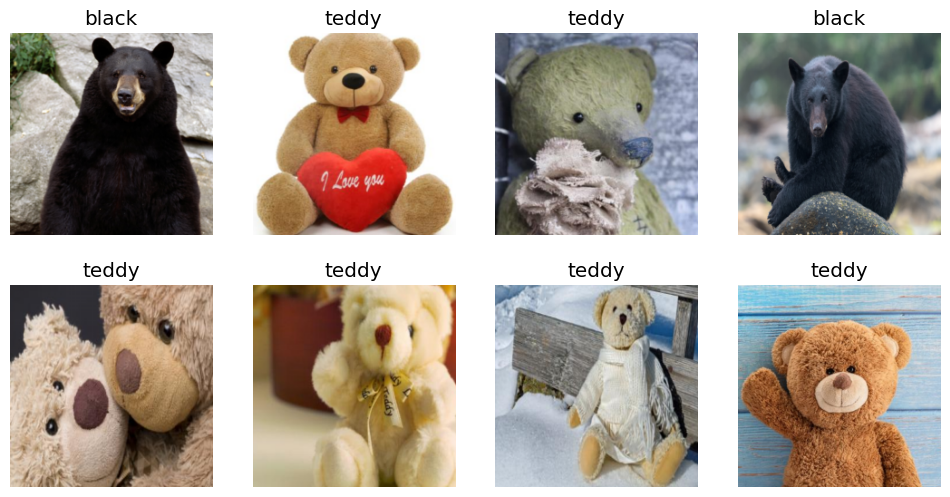

In [43]:
dls.valid.show_batch(max_n=8, nrows=2)

Por padrão `Resize` *crops* As imagens para ajustar uma forma quadrada do tamanho solicitado, usando toda a largura ou altura.Isso pode resultar em perder alguns detalhes importantes.Como alternativa, você pode pedir a Fastai para encaixar as imagens com zeros (preto), ou esmagar/esticá -las: (ResizeMethod.Squish)

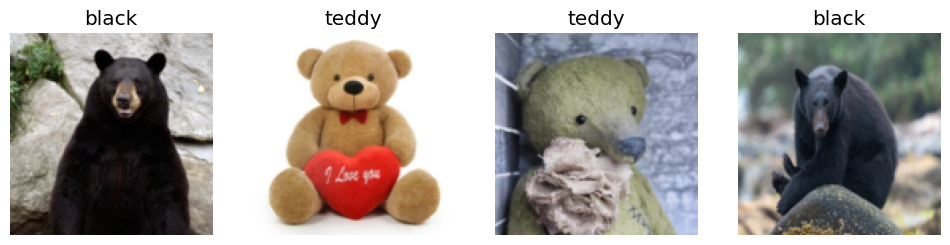

In [44]:
bears = bears.new(item_tfms=Resize(128, ResizeMethod.Squish))
dls = bears.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

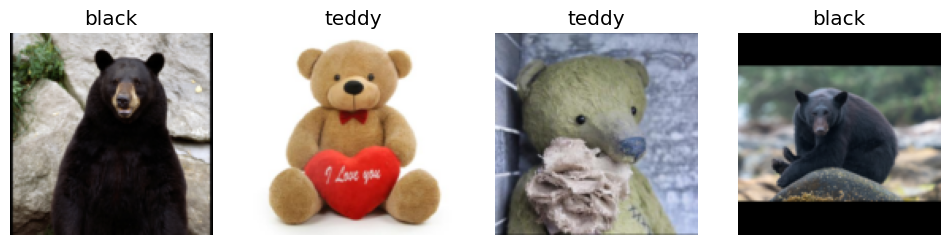

In [45]:
bears = bears.new(item_tfms=Resize(128, ResizeMethod.Pad, pad_mode='zeros'))
dls = bears.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

Todas essas abordagens parecem um tanto inúteis ou problemáticas.Se esmagarmos ou esticarmos as imagens, eles acabam como formas irreais, levando a um modelo que aprende que as coisas parecem diferentes de como elas são realmente, o que esperaríamos resultar em menor precisão.Se cortarmos as imagens, removemos alguns dos recursos que nos permitem realizar reconhecimento.Por exemplo, se estávamos tentando reconhecer raças de cão ou gato, poderíamos acabar criando uma parte essencial do corpo ou a face necessária para distinguir entre raças semelhantes.Se encerrarmos as imagens, temos muito espaço vazio, que é apenas um cálculo desperdiçado para o nosso modelo e resulta em uma resolução efetiva mais baixa para a parte da imagem que realmente usamos.

Em vez disso, o que normalmente fazemos na prática é selecionar aleatoriamente parte da imagem e cortar apenas essa parte.Em cada época (que é uma passagem completa por todas as nossas imagens no conjunto de dados), selecionamos aleatoriamente uma parte diferente de cada imagem.Isso significa que nosso modelo pode aprender a se concentrar e reconhecer diferentes recursos em nossas imagens.Ele também reflete como as imagens funcionam no mundo real: diferentes fotos da mesma coisa podem ser enquadradas de maneiras ligeiramente diferentes.

De fato, uma rede neural totalmente não treinada não sabe nada sobre como as imagens se comportam.Nem reconhece que, quando um objeto é girado em um grau, ainda é uma imagem da mesma coisa!Portanto, treinando a rede neural com exemplos de imagens em que os objetos estão em lugares ligeiramente diferentes e tamanhos ligeiramente diferentes ajudam a entender o conceito básico do que é um objeto e como ele pode ser representado em uma imagem.

Aqui está outro exemplo em que substituímos `Resize` por `RandomResizedCrop`, Que é a transformação que fornece o comportamento que acabamos de descrever.O parâmetro mais importante a ser passado é `min_scale`, que determina quanto da imagem selecionar no mínimo cada vez:

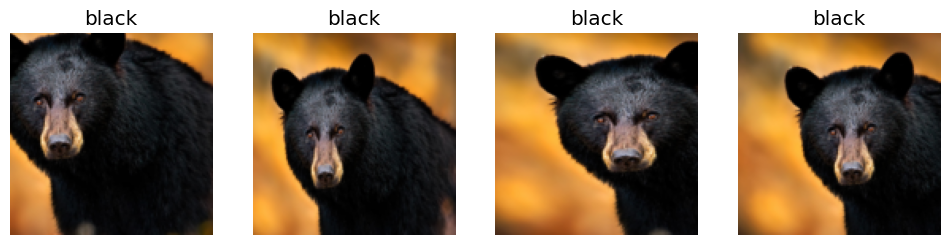

In [46]:
bears = bears.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = bears.dataloaders(path)
dls.train.show_batch(max_n=4, nrows=1, unique=True)

Nós usamos `unique=True` Para ter a mesma imagem repetida com diferentes versões desta transformada `RandomResizedCrop`.Este é um exemplo específico de uma técnica mais geral, chamada aumento de dados.

### Aumentação de dados (Data augmentation)

*Data augmentation* Refere -se à criação de variações aleatórias de nossos dados de entrada, de modo que eles pareçam diferentes, mas na verdade não alteram o significado dos dados.Exemplos de técnicas de aumento de dados comuns para imagens são rotação, inversão, deformação em perspectiva, alterações de brilho e alterações de contraste.Para imagens fotográficas naturais, como as que estamos usando aqui, um conjunto padrão de aumentos que achamos que o trabalho é muito bem fornecido com o `aug_transforms` função.Como nossas imagens agora são do mesmo tamanho, podemos aplicar esses aumentos a um lote inteiro deles usando a GPU, o que economizará muito tempo.Para dizer a Fastai, queremos usar essas transformações em um lote, usamos o `batch_tfms` parâmetro (observe que não estamos usando `RandomResizedCrop` Neste exemplo, você pode ver as diferenças mais claramente;Também estamos usando o dobro da quantidade de aumento em comparação com o padrão, pelo mesmo motivo):

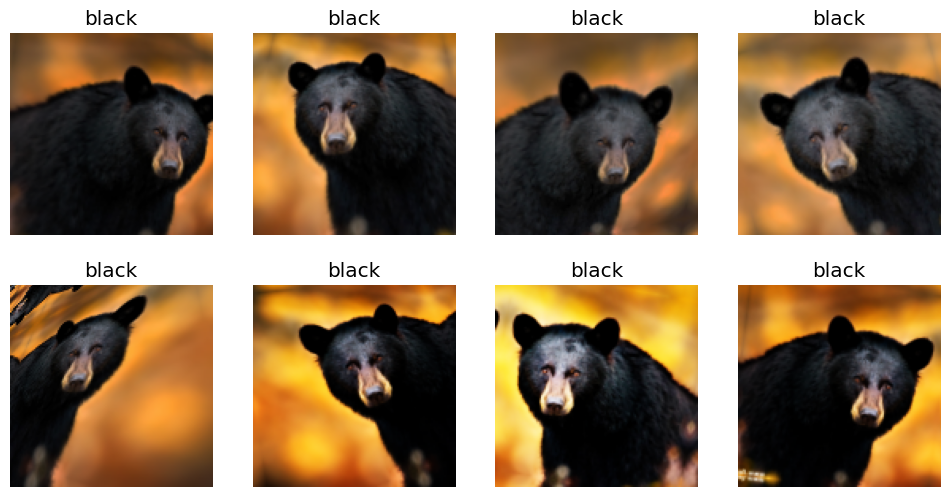

In [47]:
bears = bears.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls = bears.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

Agora que montamos nossos dados em um formato adequado para treinamento de modelos, vamos realmente treinar um classificador de imagem usando -os.

## Treinando seu modelo e usá -lo para limpar seus dados

Hora de usar as mesmas linhas de código que em << Capítulo_intro >> para treinar nosso classificador de urso.

Não temos muitos dados para o nosso problema (150 fotos de cada tipo de urso no máximo); portanto, para treinar nosso modelo, usaremos `RandomResizedCrop` com um tamanho de imagem de 224 px, que é bastante padrão para classificação de imagem e padrão `aug_transforms`:

In [48]:
bears = bears.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = bears.dataloaders(path)

Agora podemos criar nosso`Learner` E ajustá-lo da maneira usual:

In [49]:
torch.device('cuda')
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.734727,1.860101,0.576923,00:27


epoch,train_loss,valid_loss,error_rate,time
0,1.772162,1.259165,0.461538,00:28
1,1.483266,0.643688,0.307692,00:28
2,1.136335,0.402021,0.192308,00:29
3,1.050472,0.335463,0.153846,00:29


Agora, vamos ver se os erros que o modelo está cometendo estão pensando principalmente em que os griszlies são ursinhos (isso seria ruim para a segurança!), Ou que o Grizzlies são ursos pretos ou outra coisa.Para visualizar isso, podemos criar um*confusion matrix*:

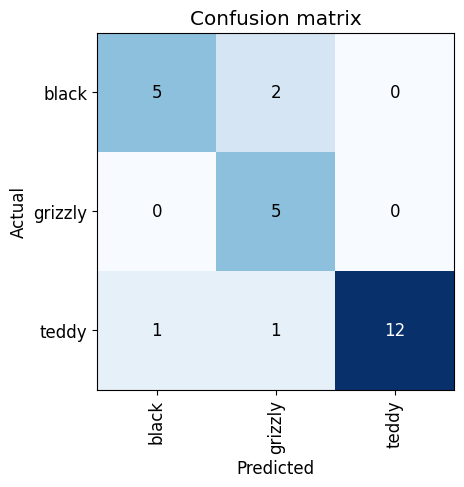

In [50]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

As linhas representam todos os ursos pretos, pardos e de pelúcia em nosso conjunto de dados, respectivamente.As colunas representam as imagens que o modelo previu como ursos pretos, pardos e de pelúcia, respectivamente.Portanto, a diagonal da matriz mostra as imagens que foram classificadas corretamente e as células fora da diagonal representam aquelas que foram classificadas incorretamente.Esta é uma das muitas maneiras pelas quais o FastAi permite visualizar os resultados do seu modelo.É (é claro!) Calculado usando o conjunto de validação.Com a codificação de cores, o objetivo é ter branco em todos os lugares, exceto a diagonal, onde queremos azul escuro.Nosso classificador de urso não está cometendo muitos erros!

É útil ver onde exatamente nossos erros estão ocorrendo, para ver se eles são devido a um problema de conjunto de dados (por exemplo, imagens que não são ursos, ou são rotuladas incorretamente etc.) ou um problema de modelo (talvez eleNão está lidando com imagens tiradas com iluminação incomum, ou de um ângulo diferente, etc.).Para fazer isso, podemos classificar nossas imagens por seus *loss*.

A perda é um número maior se o modelo estiver incorreto (especialmente se também estiver confiante em sua resposta incorreta) ou se estiver correta, mas não está confiante em sua resposta correta.Em alguns capítulos, aprenderemos em profundidade como a perda é calculada e usada no processo de treinamento.Por agora, `plot_top_losses` mostra as imagens com a maior perda em nosso conjunto de dados.Como diz o título da saída, cada imagem é rotulada com quatro coisas: previsão, real (rótulo de destino), perda e probabilidade.A * probabilidade * aqui está o nível de confiança, de zero a um, que o modelo atribuiu à sua previsão:

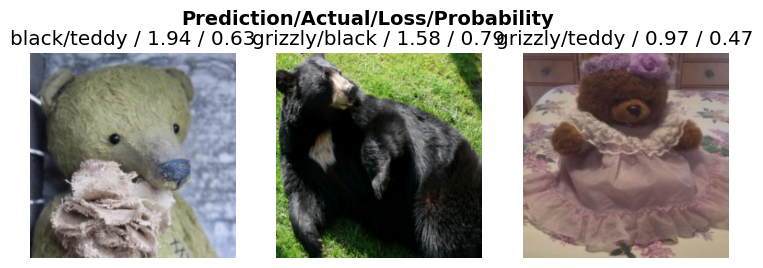

In [51]:
interp.plot_top_losses(3, nrows=1)

Essa saída mostra que a imagem com a maior perda é aquela que foi prevista como "Grizzly" com alta confiança.No entanto, é rotulado (com base em nossa pesquisa de imagem Bing) como "Black".Não somos especialistas em ursos, mas com certeza nos parece que esta etiqueta está incorreta!Provavelmente devemos mudar seu rótulo para "Grizzly".

A abordagem intuitiva para fazer a limpeza de dados é fazê -lo * antes * você treina um modelo.Mas, como você viu neste caso, um modelo pode realmente ajudá -lo a encontrar problemas de dados de maneira mais rápida e fácil.Portanto, normalmente preferimos treinar um modelo rápido e simples primeiro e depois usá -lo para nos ajudar com a limpeza de dados.

Fastai inclui uma GUI útil para limpeza de dados chamada `ImageClassifierCleaner` Isso permite que você escolha uma categoria e o conjunto de treinamento versus validação e visualize as imagens de maior perda de perda (em ordem), juntamente com os menus para permitir que as imagens sejam selecionadas para remoção ou redefinição:

In [ ]:
#hide_output
cleaner = ImageClassifierCleaner(learn)
cleaner

In [ ]:
#hide
# for idx in cleaner.delete(): cleaner.fns[idx].unlink()
# for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)

Podemos ver que entre nossos "ursos pretos" é uma imagem que contém dois ursos: um grisalho, um preto.Então, devemos escolher `<Delete>` No menu nesta imagem. `ImageClassifierCleaner` Na verdade, não faz a exclusão ou a troca de rótulos para você;Ele apenas retorna os índices de itens para alterar.Assim, por exemplo, para excluir (`desvincular) todas as imagens selecionadas para exclusão, nós executaríamos:

```python
for idx in cleaner.delete(): cleaner.fns[idx].unlink()
```

To move images for which we've selected a different category, we would run:

```python
for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)
```

> s: Limpar os dados e prepará -los para o seu modelo são dois dos maiores desafios para os cientistas de dados;Eles dizem que é preciso 90% do seu tempo.A Biblioteca Fastai visa fornecer ferramentas que facilitam o máximo possível.

Veremos mais exemplos de limpeza de dados orientada a modelos ao longo deste livro.Depois de limpar nossos dados, podemos treinar nosso modelo.Experimente você mesmo e veja se sua precisão melhora!

> NOTA: Não há necessidade de big data: depois de limpar o conjunto de dados usando essas etapas, geralmente estamos vendo 100% de precisão nessa tarefa.Até vemos esse resultado quando baixamos muito menos imagens do que os 150 por classe que estamos usando aqui.Como você pode ver, a reclamação comum de que você precisa de grandes quantidades de dados para fazer aprendizado profundo_ pode estar muito longe da verdade!

Agora que treinamos nosso modelo, vamos ver como podemos implantá -lo para ser usado na prática.

## Transformando seu modelo em um aplicativo online

Agora vamos analisar o que é preciso para transformar esse modelo em um aplicativo on -line em funcionamento.Vamos apenas criar um protótipo básico de trabalho;Não temos o escopo deste livro para ensinar todos os detalhes do desenvolvimento de aplicativos da Web em geral.

### Usando o modelo para inferência

Depois de obter um modelo com o qual você está satisfeito, você precisa salvá -lo, para poder copiá -lo para um servidor onde o usará na produção.Lembre -se de que um modelo consiste em duas partes: a *arquitetura *e os parâmetros *treinados * *.A maneira mais fácil de salvar o modelo é salvar ambos, porque, assim, quando você carrega um modelo, pode ter certeza de que possui a arquitetura e os parâmetros correspondentes.Para salvar as duas partes, use o`export` método.

Este método salva até a definição de como criar seus `dataloaders`.Isso é importante, porque, caso contrário, você teria que redefinir como transformar seus dados para usar seu modelo na produção.O Fastai usa automaticamente seu conjunto de validação `dataloader` para inferência por padrão, para que seu aumento de dados não seja aplicado, que geralmente é o que você deseja.

Quando Você ligar `export`, O Fastai salvará um arquivo chamado "export.pkl":

In [52]:
learn.export()

Vamos verificar se o arquivo existe, usando o método `LS` que o Fastai adiciona à classe` Path` do Python:

In [6]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

Você precisará deste arquivo onde quer que implante seu aplicativo.Por enquanto, vamos tentar criar um aplicativo simples em nosso notebook.

Quando usamos um modelo para obter previsões, em vez de treinar, chamamos de *inference*. Para criar nosso aluno de inferência a partir do arquivo exportado, usamos`load_learner` (Nesse caso, isso não é realmente necessário, já que já temos um trabalho `Learner` em nosso caderno;Estamos apenas fazendo isso aqui para que você possa ver todo o processo de ponta a ponta):

In [7]:
learn_inf = load_learner(path/'export.pkl')

Quando estamos fazendo inferência, geralmente estamos apenas obtendo previsões para uma imagem de cada vez.Para fazer isso, passe um nome de arquivo para `predict`:

In [8]:
learn_inf.predict('images/grizzly.jpg')

('grizzly', tensor(1), tensor([1.4774e-01, 8.5225e-01, 1.0926e-05]))

Isso retornou três coisas: a categoria prevista no mesmo formato que você forneceu originalmente (neste caso, que é uma string), o índice da categoria prevista e as probabilidades de cada categoria.Os dois últimos são baseados na ordem das categorias no *vocab* do `DataLoaders`; Ou seja, a lista armazenada de todas as categorias possíveis.Em tempo de inferência, você pode acessar o `DataLoaders` como um atributo do `Learner`:

In [9]:
learn_inf.dls.vocab

['black', 'grizzly', 'teddy']

Podemos ver aqui que, se indexamos o vocabulário com o número inteiro devolvido por `predict` Então voltamos "grizzly," como esperado.Além disso, observe que, se indexamos a lista de probabilidades, vemos uma probabilidade de quase 1,00 grizzly.

Sabemos como fazer previsões com o nosso modelo salvo, por isso temos tudo o que precisamos para começar a criar nosso aplicativo.Podemos fazer isso diretamente em um notebook Jupyter.

### Criando um aplicativo de notebook a partir do modelo

Para usar nosso modelo em um aplicativo, podemos simplesmente tratar o `predict` método como uma função regular.Portanto, a criação de um aplicativo a partir do modelo pode ser feita usando qualquer uma das inúmeras estruturas e técnicas disponíveis para os desenvolvedores de aplicativos.

No entanto, a maioria dos cientistas de dados não conhece o mundo do desenvolvimento de aplicativos da web.Então, vamos tentar usar algo que você faz, neste momento, saiba: Acontece que podemos criar um aplicativo Web completo usando nada além de notebooks Jupyter!As duas coisas que precisamos fazer isso acontecer são:

- IPython widgets (ipywidgets)
- Voilà

*IPython widgets* São componentes da GUI que reúnem a funcionalidade JavaScript e Python em um navegador da Web e podem ser criados e usados em um notebook Jupyter.Por exemplo, o limpador de imagem que vimos anteriormente neste capítulo é totalmente escrito com widgets ipython.No entanto, não queremos exigir que os usuários do nosso aplicativo executem o próprio Jupyter.

Por isso *Voilà* existe.É um sistema para tornar os aplicativos que consistem em widgets ipython disponíveis para os usuários finais, sem que eles tenham que usar o Jupyter.O Voilà está aproveitando o fato de que um notebook _already é um tipo de aplicativo da web, apenas um bastante complexo que depende de outro aplicativo da web: o próprio Jupyter.Essencialmente, isso nos ajuda a converter automaticamente o aplicativo Web complexo que já criamos implicitamente (o notebook) em um aplicativo da Web mais simples e fácil de implementar, que funciona como um aplicativo da Web normal, em vez de um notebook.

Mas ainda temos a vantagem de desenvolver em um notebook; portanto, com o iPyWidgets, podemos criar nossa GUI passo a passo.Usaremos essa abordagem para criar um classificador de imagem simples.Primeiro, precisamos de um widget de upload de arquivos:

In [10]:
#hide_output
import ipywidgets as widgets
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

Agora podemos pegar a imagem:

In [11]:
# hide
# Para o livro, não podemos realmente clicar em um botão de upload, então fingimos
btn_upload = SimpleNamespace(data = ['images/grizzly.jpg'])

In [12]:
img = PILImage.create(btn_upload.data[-1])

Podemos usar um widget `output` para exibi -lo:

In [13]:
#hide_output
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

Output()

Então podemos obter nossas previsões:

In [14]:
pred,pred_idx,probs = learn_inf.predict(img)

e use a `Label` para exibi -los:

In [15]:
#hide_output
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: grizzly; Probability: 0.8522')

`Prediction: grizzly; Probability: 1.0000`

Precisaremos de um botão para fazer a classificação.Parece exatamente com o botão de upload:

In [16]:
#hide_output
btn_run = widgets.Button(description='Classify')
btn_run

Button(description='Classify', style=ButtonStyle())

Também precisaremos de um*click event handler*; Ou seja, uma função que será chamada quando for pressionada.Podemos simplesmente copiar sobre as linhas de código de cima:

In [17]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

Você pode testar o botão agora pressionando -o e você deve ver a imagem e as previsões atualizadas automaticamente!

Agora podemos colocá -los todos em uma caixa vertical (`VBox`) Para completar nossa GUI:

In [18]:
#hide
#Putting back btn_upload to a widget for next cell
btn_upload = widgets.FileUpload()

In [19]:
#hide_output
VBox([widgets.Label('Select your bear!'), 
      btn_upload, btn_run, out_pl, lbl_pred])

Escrevemos todo o código necessário para o nosso aplicativo.O próximo passo é convertê -lo em algo que podemos implantar.

### Transformando seu jupyter notebook em um aplicativo real

In [20]:
#hide
# !pip install voila
# !jupyter serverextension enable --sys-prefix voila 

Agora que temos tudo funcionando neste notebook Jupyter, podemos criar nosso aplicativo.Para fazer isso, inicie um novo notebook e adicione a ele apenas o código necessário para criar e mostrar os widgets que você precisa e o markdown para qualquer texto que você queira aparecer.Dê uma olhada no notebook * bear_classifier * no repositório do livro para ver o aplicativo simples de notebook que criamos.

Em seguida, instale o voilà se você ainda não, copiando essas linhas em uma célula de notebooks e executando -a:

    !pip install voila
    !jupyter serverextension enable --sys-prefix voila

Cells that begin with a `!` do not contain Python code, but instead contain code that is passed to your shell (bash, Windows PowerShell, etc.). If you are comfortable using the command line, which we'll discuss more later in this book, you can of course simply type these two lines (without the `!` prefix) directly into your terminal. In this case, the first line installs the `voila` library and application, and the second connects it to your existing Jupyter notebook.

Voilà runs Jupyter notebooks just like the Jupyter notebook server you are using now does, but it also does something very important: it removes all of the cell inputs, and only shows output (including ipywidgets), along with your markdown cells. So what's left is a web application! To view your notebook as a Voilà web application, replace the word "notebooks" in your browser's URL with: "voila/render". You will see the same content as your notebook, but without any of the code cells.

Of course, you don't need to use Voilà or ipywidgets. Your model is just a function you can call (`pred,pred_idx,probs = learn.predict(img)`), so you can use it with any framework, hosted on any platform. And you can take something you've prototyped in ipywidgets and Voilà and later convert it into a regular web application. We're showing you this approach in the book because we think it's a great way for data scientists and other folks that aren't web development experts to create applications from their models.

We have our app, now let's deploy it!

### Deploying your app

As you now know, you need a GPU to train nearly any useful deep learning model. So, do you need a GPU to use that model in production? No! You almost certainly *do not need a GPU to serve your model in production*. There are a few reasons for this:

- As we've seen, GPUs are only useful when they do lots of identical work in parallel. If you're doing (say) image classification, then you'll normally be classifying just one user's image at a time, and there isn't normally enough work to do in a single image to keep a GPU busy for long enough for it to be very efficient. So, a CPU will often be more cost-effective.
- An alternative could be to wait for a few users to submit their images, and then batch them up and process them all at once on a GPU. But then you're asking your users to wait, rather than getting answers straight away! And you need a high-volume site for this to be workable. If you do need this functionality, you can use a tool such as Microsoft's [ONNX Runtime](https://github.com/microsoft/onnxruntime), or [AWS Sagemaker](https://aws.amazon.com/sagemaker/)
- The complexities of dealing with GPU inference are significant. In particular, the GPU's memory will need careful manual management, and you'll need a careful queueing system to ensure you only process one batch at a time.
- There's a lot more market competition in CPU than GPU servers, as a result of which there are much cheaper options available for CPU servers.

Because of the complexity of GPU serving, many systems have sprung up to try to automate this. However, managing and running these systems is also complex, and generally requires compiling your model into a different form that's specialized for that system. It's typically preferable to avoid dealing with this complexity until/unless your app gets popular enough that it makes clear financial sense for you to do so.

For at least the initial prototype of your application, and for any hobby projects that you want to show off, you can easily host them for free. The best place and the best way to do this will vary over time, so check the [book's website](https://book.fast.ai/) for the most up-to-date recommendations. As we're writing this book in early 2020 the simplest (and free!) approach is to use [Binder](https://mybinder.org/). To publish your web app on Binder, you follow these steps:

1. Add your notebook to a [GitHub repository](http://github.com/).
2. Paste the URL of that repo into Binder's URL, as shown in <<deploy-binder>>.
3. Change the File dropdown to instead select URL.
4. In the "URL to open" field, enter `/voila/render/name.ipynb` (replacing `name` with the name of for your notebook).
5. Click the clickboard button at the bottom right to copy the URL and paste it somewhere safe. 
6. Click Launch.

<img alt="Deploying to Binder" width="800" caption="Deploying to Binder" id="deploy-binder" src="images/att_00001.png">

The first time you do this, Binder will take around 5 minutes to build your site. Behind the scenes, it is finding a virtual machine that can run your app, allocating storage, collecting the files needed for Jupyter, for your notebook, and for presenting your notebook as a web application.

Finally, once it has started the app running, it will navigate your browser to your new web app. You can share the URL you copied to allow others to access your app as well.

For other (both free and paid) options for deploying your web app, be sure to take a look at the [book's website](https://book.fast.ai/).

You may well want to deploy your application onto mobile devices, or edge devices such as a Raspberry Pi. There are a lot of libraries and frameworks that allow you to integrate a model directly into a mobile application. However, these approaches tend to require a lot of extra steps and boilerplate, and do not always support all the PyTorch and fastai layers that your model might use. In addition, the work you do will depend on what kind of mobile devices you are targeting for deployment—you might need to do some work to run on iOS devices, different work to run on newer Android devices, different work for older Android devices, etc. Instead, we recommend wherever possible that you deploy the model itself to a server, and have your mobile or edge application connect to it as a web service.

There are quite a few upsides to this approach. The initial installation is easier, because you only have to deploy a small GUI application, which connects to the server to do all the heavy lifting. More importantly perhaps, upgrades of that core logic can happen on your server, rather than needing to be distributed to all of your users. Your server will have a lot more memory and processing capacity than most edge devices, and it is far easier to scale those resources if your model becomes more demanding. The hardware that you will have on a server is also going to be more standard and more easily supported by fastai and PyTorch, so you don't have to compile your model into a different form.

There are downsides too, of course. Your application will require a network connection, and there will be some latency each time the model is called. (It takes a while for a neural network model to run anyway, so this additional network latency may not make a big difference to your users in practice. In fact, since you can use better hardware on the server, the overall latency may even be less than if it were running locally!) Also, if your application uses sensitive data then your users may be concerned about an approach which sends that data to a remote server, so sometimes privacy considerations will mean that you need to run the model on the edge device (it may be possible to avoid this by having an *on-premise* server, such as inside a company's firewall). Managing the complexity and scaling the server can create additional overhead too, whereas if your model runs on the edge devices then each user is bringing their own compute resources, which leads to easier scaling with an increasing number of users (also known as *horizontal scaling*).

> A: I've had a chance to see up close how the mobile ML landscape is changing in my work. We offer an iPhone app that depends on computer vision, and for years we ran our own computer vision models in the cloud. This was the only way to do it then since those models needed significant memory and compute resources and took minutes to process inputs. This approach required building not only the models (fun!) but also the infrastructure to ensure a certain number of "compute worker machines" were absolutely always running (scary), that more machines would automatically come online if traffic increased, that there was stable storage for large inputs and outputs, that the iOS app could know and tell the user how their job was doing, etc. Nowadays Apple provides APIs for converting models to run efficiently on device and most iOS devices have dedicated ML hardware, so that's the strategy we use for our newer models. It's still not easy but in our case it's worth it, for a faster user experience and to worry less about servers. What works for you will depend, realistically, on the user experience you're trying to create and what you personally find is easy to do. If you really know how to run servers, do it. If you really know how to build native mobile apps, do that. There are many roads up the hill.

Overall, we'd recommend using a simple CPU-based server approach where possible, for as long as you can get away with it. If you're lucky enough to have a very successful application, then you'll be able to justify the investment in more complex deployment approaches at that time.

Congratulations, you have successfully built a deep learning model and deployed it! Now is a good time to take a pause and think about what could go wrong.

## How to Avoid Disaster

In practice, a deep learning model will be just one piece of a much bigger system. As we discussed at the start of this chapter, a data product requires thinking about the entire end-to-end process, from conception to use in production. In this book, we can't hope to cover all the complexity of managing deployed data products, such as managing multiple versions of models, A/B testing, canarying, refreshing the data (should we just grow and grow our datasets all the time, or should we regularly remove some of the old data?), handling data labeling, monitoring all this, detecting model rot, and so forth. In this section we will give an overview of some of the most important issues to consider; for a more detailed discussion of deployment issues we refer to you to the excellent [Building Machine Learning Powered Applications](http://shop.oreilly.com/product/0636920215912.do) by Emmanuel Ameisen (O'Reilly)

One of the biggest issues to consider is that understanding and testing the behavior of a deep learning model is much more difficult than with most other code you write. With normal software development you can analyze the exact steps that the software is taking, and carefully study which of these steps match the desired behavior that you are trying to create. But with a neural network the behavior emerges from the model's attempt to match the training data, rather than being exactly defined.

This can result in disaster! For instance, let's say we really were rolling out a bear detection system that will be attached to video cameras around campsites in national parks, and will warn campers of incoming bears. If we used a model trained with the dataset we downloaded there would be all kinds of problems in practice, such as:

- Working with video data instead of images
- Handling nighttime images, which may not appear in this dataset
- Dealing with low-resolution camera images
- Ensuring results are returned fast enough to be useful in practice
- Recognizing bears in positions that are rarely seen in photos that people post online (for example from behind, partially covered by bushes, or when a long way away from the camera)

A big part of the issue is that the kinds of photos that people are most likely to upload to the internet are the kinds of photos that do a good job of clearly and artistically displaying their subject matter—which isn't the kind of input this system is going to be getting. So, we may need to do a lot of our own data collection and labelling to create a useful system.

This is just one example of the more general problem of *out-of-domain* data. That is to say, there may be data that our model sees in production which is very different to what it saw during training. There isn't really a complete technical solution to this problem; instead, we have to be careful about our approach to rolling out the technology.

There are other reasons we need to be careful too. One very common problem is *domain shift*, where the type of data that our model sees changes over time. For instance, an insurance company may use a deep learning model as part of its pricing and risk algorithm, but over time the types of customers that the company attracts, and the types of risks they represent, may change so much that the original training data is no longer relevant.

Out-of-domain data and domain shift are examples of a larger problem: that you can never fully understand the entire behaviour of your neural network. They have far too many parameters to be able to analytically understand all of their possible behaviors. This is the natural downside of their best feature—their flexibility, which enables them to solve complex problems where we may not even be able to fully specify our preferred solution approaches. The good news, however, is that there are ways to mitigate these risks using a carefully thought-out process. The details of this will vary depending on the details of the problem you are solving, but we will attempt to lay out here a high-level approach, summarized in <<deploy_process>>, which we hope will provide useful guidance.

<img alt="Deployment process" width="500" caption="Deployment process" id="deploy_process" src="images/att_00061.png">

Where possible, the first step is to use an entirely manual process, with your deep learning model approach running in parallel but not being used directly to drive any actions. The humans involved in the manual process should look at the deep learning outputs and check whether they make sense. For instance, with our bear classifier a park ranger could have a screen displaying video feeds from all the cameras, with any possible bear sightings simply highlighted in red. The park ranger would still be expected to be just as alert as before the model was deployed; the model is simply helping to check for problems at this point.

The second step is to try to limit the scope of the model, and have it carefully supervised by people. For instance, do a small geographically and time-constrained trial of the model-driven approach. Rather than rolling our bear classifier out in every national park throughout the country, we could pick a single observation post, for a one-week period, and have a park ranger check each alert before it goes out.

Then, gradually increase the scope of your rollout. As you do so, ensure that you have really good reporting systems in place, to make sure that you are aware of any significant changes to the actions being taken compared to your manual process. For instance, if the number of bear alerts doubles or halves after rollout of the new system in some location, we should be very concerned. Try to think about all the ways in which your system could go wrong, and then think about what measure or report or picture could reflect that problem, and ensure that your regular reporting includes that information.

> J: I started a company 20 years ago called _Optimal Decisions_ that used machine learning and optimization to help giant insurance companies set their pricing, impacting tens of billions of dollars of risks. We used the approaches described here to manage the potential downsides of something going wrong. Also, before we worked with our clients to put anything in production, we tried to simulate the impact by testing the end-to-end system on their previous year's data. It was always quite a nerve-wracking process, putting these new algorithms into production, but every rollout was successful.

### Unforeseen Consequences and Feedback Loops

One of the biggest challenges in rolling out a model is that your model may change the behaviour of the system it is a part of. For instance, consider a "predictive policing" algorithm that predicts more crime in certain neighborhoods, causing more police officers to be sent to those neighborhoods, which can result in more crimes being recorded in those neighborhoods, and so on. In the Royal Statistical Society paper ["To Predict and Serve?"](https://rss.onlinelibrary.wiley.com/doi/full/10.1111/j.1740-9713.2016.00960.x), Kristian Lum and William Isaac observe that: "predictive policing is aptly named: it is predicting future policing, not future crime."

Part of the issue in this case is that in the presence of bias (which we'll discuss in depth in the next chapter), *feedback loops* can result in negative implications of that bias getting worse and worse. For instance, there are concerns that this is already happening in the US, where there is significant bias in arrest rates on racial grounds. [According to the ACLU](https://www.aclu.org/issues/smart-justice/sentencing-reform/war-marijuana-black-and-white), "despite roughly equal usage rates, Blacks are 3.73 times more likely than whites to be arrested for marijuana." The impact of this bias, along with the rollout of predictive policing algorithms in many parts of the US, led Bärí Williams to [write in the *New York Times*](https://www.nytimes.com/2017/12/02/opinion/sunday/intelligent-policing-and-my-innocent-children.html): "The same technology that’s the source of so much excitement in my career is being used in law enforcement in ways that could mean that in the coming years, my son, who is 7 now, is more likely to be profiled or arrested—or worse—for no reason other than his race and where we live."

A helpful exercise prior to rolling out a significant machine learning system is to consider this question: "What would happen if it went really, really well?" In other words, what if the predictive power was extremely high, and its ability to influence behavior was extremely significant? In that case, who would be most impacted? What would the most extreme results potentially look like? How would you know what was really going on?

Such a thought exercise might help you to construct a more careful rollout plan, with ongoing monitoring systems and human oversight. Of course, human oversight isn't useful if it isn't listened to, so make sure that there are reliable and resilient communication channels so that the right people will be aware of issues, and will have the power to fix them.

## Get Writing!

One of the things our students have found most helpful to solidify their understanding of this material is to write it down. There is no better test of your understanding of a topic than attempting to teach it to somebody else. This is helpful even if you never show your writing to anybody—but it's even better if you share it! So we recommend that, if you haven't already, you start a blog. Now that you've completed Chapter 2 and have learned how to train and deploy models, you're well placed to write your first blog post about your deep learning journey. What's surprised you? What opportunities do you see for deep learning in your field? What obstacles do you see?

Rachel Thomas, cofounder of fast.ai, wrote in the article ["Why You (Yes, You) Should Blog"](https://medium.com/@racheltho/why-you-yes-you-should-blog-7d2544ac1045):

```asciidoc
____
The top advice I would give my younger self would be to start blogging sooner. Here are some reasons to blog:

* It’s like a resume, only better. I know of a few people who have had blog posts lead to job offers!
* Helps you learn. Organizing knowledge always helps me synthesize my own ideas. One of the tests of whether you understand something is whether you can explain it to someone else. A blog post is a great way to do that.
* I’ve gotten invitations to conferences and invitations to speak from my blog posts. I was invited to the TensorFlow Dev Summit (which was awesome!) for writing a blog post about how I don’t like TensorFlow.
* Meet new people. I’ve met several people who have responded to blog posts I wrote.
* Saves time. Any time you answer a question multiple times through email, you should turn it into a blog post, which makes it easier for you to share the next time someone asks.
____
```

Perhaps her most important tip is this: 

> : You are best positioned to help people one step behind you. The material is still fresh in your mind. Many experts have forgotten what it was like to be a beginner (or an intermediate) and have forgotten why the topic is hard to understand when you first hear it. The context of your particular background, your particular style, and your knowledge level will give a different twist to what you’re writing about.

We've provided full details on how to set up a blog in <<appendix_blog>>. If you don't have a blog already, take a look at that now, because we've got a really great approach set up for you to start blogging for free, with no ads—and you can even use Jupyter Notebook!

## Questionnaire

1. Provide an example of where the bear classification model might work poorly in production, due to structural or style differences in the training data.
1. Where do text models currently have a major deficiency?
1. What are possible negative societal implications of text generation models?
1. In situations where a model might make mistakes, and those mistakes could be harmful, what is a good alternative to automating a process?
1. What kind of tabular data is deep learning particularly good at?
1. What's a key downside of directly using a deep learning model for recommendation systems?
1. What are the steps of the Drivetrain Approach?
1. How do the steps of the Drivetrain Approach map to a recommendation system?
1. Create an image recognition model using data you curate, and deploy it on the web.
1. What is `DataLoaders`?
1. What four things do we need to tell fastai to create `DataLoaders`?
1. What does the `splitter` parameter to `DataBlock` do?
1. How do we ensure a random split always gives the same validation set?
1. What letters are often used to signify the independent and dependent variables?
1. What's the difference between the crop, pad, and squish resize approaches? When might you choose one over the others?
1. What is data augmentation? Why is it needed?
1. What is the difference between `item_tfms` and `batch_tfms`?
1. What is a confusion matrix?
1. What does `export` save?
1. What is it called when we use a model for getting predictions, instead of training?
1. What are IPython widgets?
1. When might you want to use CPU for deployment? When might GPU be better?
1. What are the downsides of deploying your app to a server, instead of to a client (or edge) device such as a phone or PC?
1. What are three examples of problems that could occur when rolling out a bear warning system in practice?
1. What is "out-of-domain data"?
1. What is "domain shift"?
1. What are the three steps in the deployment process?

### Further Research

1. Consider how the Drivetrain Approach maps to a project or problem you're interested in.
1. When might it be best to avoid certain types of data augmentation?
1. For a project you're interested in applying deep learning to, consider the thought experiment "What would happen if it went really, really well?"
1. Start a blog, and write your first blog post. For instance, write about what you think deep learning might be useful for in a domain you're interested in.